# nested image classification

## Evaluation workbook

This workbook uses the predictions made on `./data/test_data/` to evaluate the performance of the model  


First of all, load the required libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
# for elementary image manipulation
from scipy import misc

import nested_utilities as nutil
import nested_plot as nplot

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
sns.set()

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Initial evaluation

Load the prediction dataframe created in the prediction workbook

In [2]:
# Load the prediction df if not running the prediction code
interior_test_pred = pd.read_csv('./data_catalogues/interior_test_pred_260318.csv', index_col=0)
interior_test_pred.head()

,room,label1,label1_P,label2,label2_P,label3,label3_P,label1_correct,label2_correct,label3_correct,image_path,filename,id
0,bathroom,bathroom,0.999998,kitchen,0.000001,empty,7.169086e-08,True,False,False,./data/test_data/bathroom/003457d1fb62155b4531...,003457d1fb62155b4531aba3e5b39f4d57bed9f9.jpg,003457d1fb62155b4531aba3e5b39f4d57bed9f9
1,bathroom,bathroom,0.999782,kitchen,0.000217,diningroom,9.364485e-07,True,False,False,./data/test_data/bathroom/0038cad4553a9922d24a...,0038cad4553a9922d24a70a4d77abb9d2c1261f9.jpg,0038cad4553a9922d24a70a4d77abb9d2c1261f9
2,bathroom,bathroom,0.999678,bedroom,0.000118,kitchen,1.028072e-04,True,False,False,./data/test_data/bathroom/003f5052b875f64f4f5c...,003f5052b875f64f4f5ce99948ae87f35d44b009.jpg,003f5052b875f64f4f5ce99948ae87f35d44b009
3,bathroom,bathroom,0.999844,kitchen,0.000082,bedroom,5.523511e-05,True,False,False,./data/test_data/bathroom/009e866e3eb114c3bc85...,009e866e3eb114c3bc8579d780a4c333ddd38da9.jpg,009e866e3eb114c3bc8579d780a4c333ddd38da9
4,bathroom,bathroom,0.999998,kitchen,0.000002,diningroom,1.329193e-09,True,False,False,./data/test_data/bathroom/00da56e13e015b383eff...,00da56e13e015b383effff3fe8560ae7fa7cb1f9.jpg,00da56e13e015b383effff3fe8560ae7fa7cb1f9


Take a look at proportion of labels 1,2,3 correct

In [5]:
print('Label 1 correct: Proportion = {:.4f}'.format(interior_test_pred['label1_correct'].mean())) 
print('Label 2 correct: Proportion = {:.4f}'.format(interior_test_pred['label2_correct'].mean())) 
print('Label 3 correct: Proportion = {:.4f}'.format(interior_test_pred['label3_correct'].mean())) 

Label 1 correct: Proportion = 0.8507
Label 2 correct: Proportion = 0.0852
Label 3 correct: Proportion = 0.0288


And look at overall accuracy score, classification report & confusion matrix

Accuracy score (Label1): 0.8507

              precision    recall  f1-score   support

    bathroom       0.99      0.94      0.96       602
     bedroom       0.91      0.93      0.92       856
conservatory       1.00      0.64      0.78        22
  diningroom       0.80      0.61      0.69       277
       empty       0.83      0.94      0.88       362
    entrance       0.64      0.53      0.58       105
     graphic       1.00      0.83      0.90        23
     kitchen       0.86      0.93      0.89       681
  livingroom       0.85      0.83      0.84       704
    misc_int       0.46      0.38      0.42       154
       study       0.35      0.56      0.43        66

 avg / total       0.85      0.85      0.85      3852



''

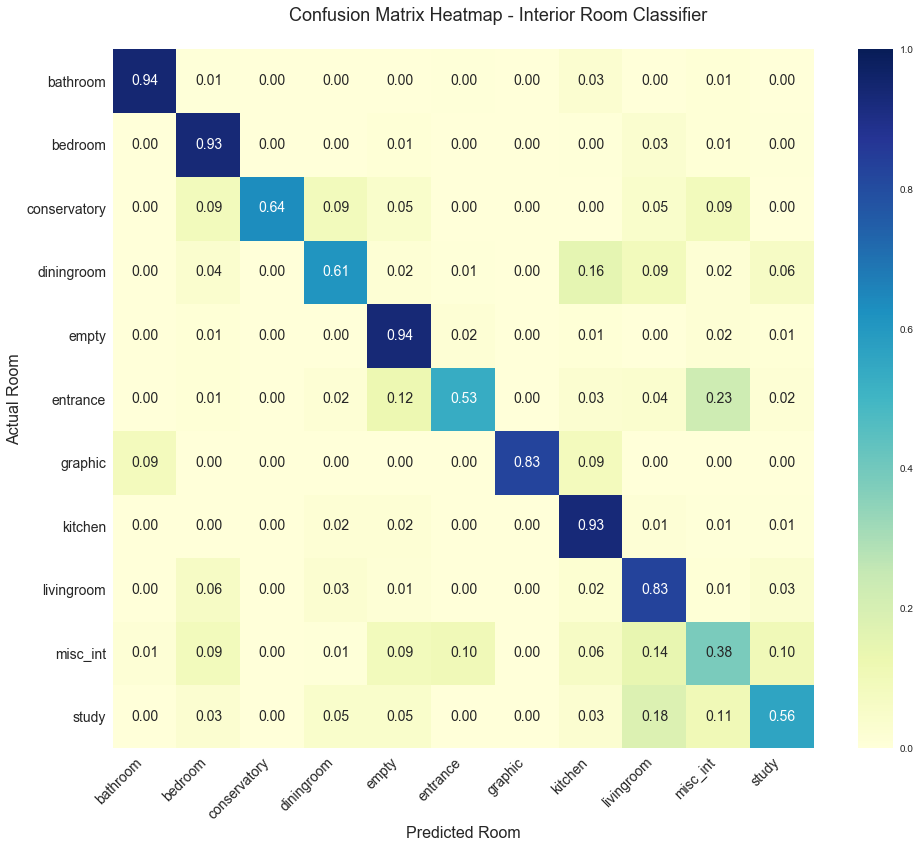

In [7]:
y_true = interior_test_pred['room']
y_pred = interior_test_pred['label1']
labels = interior_test_pred['room'].unique()

conf_mat = confusion_matrix(y_true, y_pred, labels=labels)

print('Accuracy score (Label1): {:.4f}\n'.format(accuracy_score(y_true, y_pred)))
print(classification_report(y_true, y_pred))

fig, ax = plt.subplots(figsize=(14,12))


nplot.plot_confusion_matrix(conf_mat, labels, fig, ax, normalise=True)
;

In [ ]:
#fig.savefig('./working_data/int_class_cm.png')

Now look at samples where Label1 is **incorrect**, and look at confusion matrix for Label2

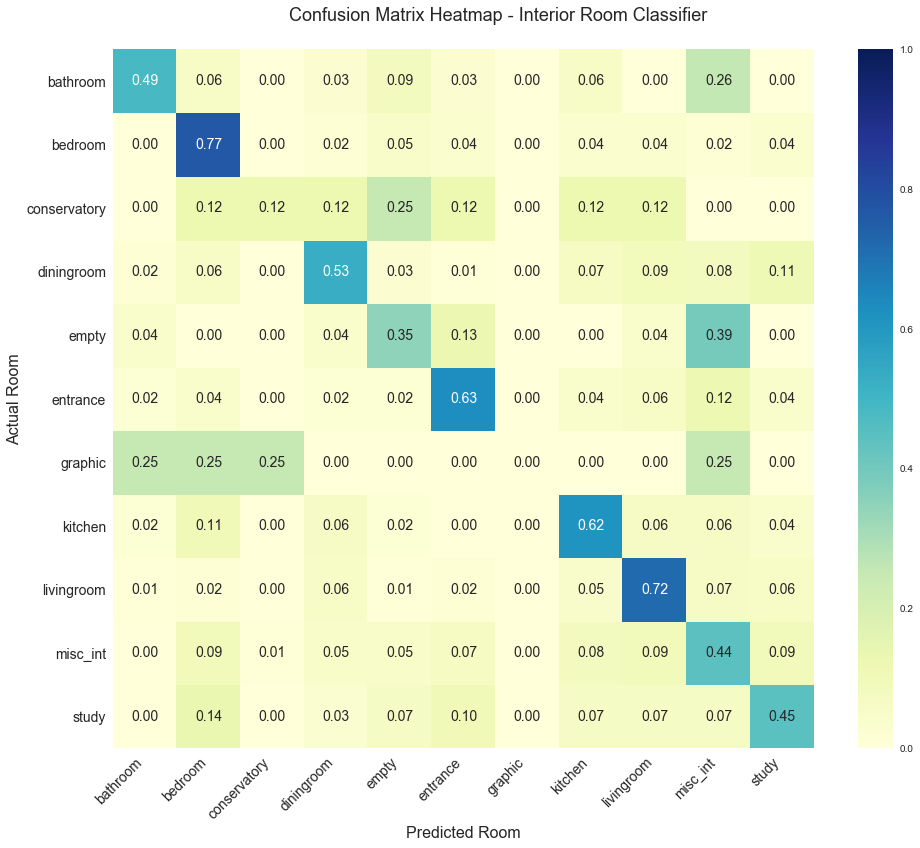

In [8]:
label2 = interior_test_pred.loc[interior_test_pred['label1_correct'] == False].copy()

y_true_2 = label2['room']
y_pred_2 = label2['label2']
labels_2 = label2['room'].unique()

conf_mat_2 = confusion_matrix(y_true_2, y_pred_2, labels=labels_2)
#conf_mat_2

fig, ax = plt.subplots(figsize=(14,12))

nplot.plot_confusion_matrix(conf_mat_2, labels_2, fig, ax, normalise=True)

What can we see in distribution of probabilities for Label2 in populations where Label1 is correct vs. those where label 2 is correct?

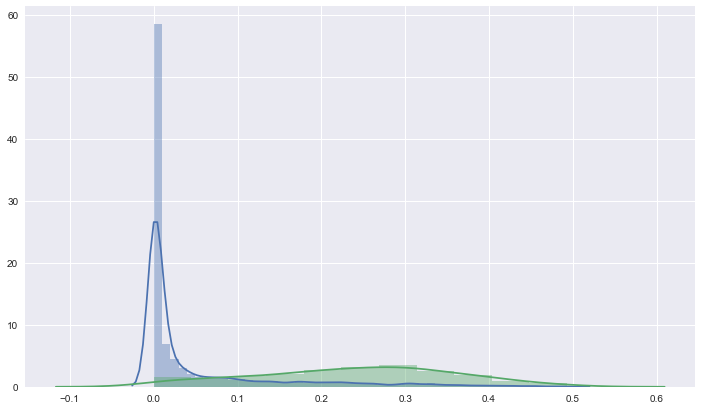

In [13]:
data = interior_test_pred.loc[interior_test_pred['label1_correct'] == True, ['label2_P']]
data_2 = interior_test_pred.loc[interior_test_pred['label2_correct'] == True, ['label2_P']]

fig, ax = plt.subplots(figsize=(12,7))

sns.distplot(data, kde=True, ax=ax)
sns.distplot(data_2, kde=True, ax=ax)

In [9]:
mask = ((interior_test_pred['label1_correct'] == False) & (interior_test_pred['label1_P'] > 0.9))
print(interior_test_pred.loc[mask].shape)
interior_test_pred.loc[mask]

(49, 13)


,room,label1,label1_P,label2,label2_P,label3,label3_P,label1_correct,label2_correct,label3_correct,image_path,filename,id
195,bathroom,kitchen,0.990098,bathroom,8.637263e-03,livingroom,4.604210e-04,False,True,False,./data/test_data/bathroom/06992327e67ab4a6783e...,06992327e67ab4a6783ea2fc9640aa6dcb5e69f6.jpg,06992327e67ab4a6783ea2fc9640aa6dcb5e69f6
227,bathroom,kitchen,0.973387,bathroom,1.933282e-02,misc_int,1.956247e-03,False,True,False,./data/test_data/bathroom/06e55cbcafa42eb5fa46...,06e55cbcafa42eb5fa4668bb0696fda0ef470ca3.jpg,06e55cbcafa42eb5fa4668bb0696fda0ef470ca3
236,bathroom,kitchen,0.969115,empty,1.546607e-02,livingroom,6.764074e-03,False,False,False,./data/test_data/bathroom/06efb8b31442e23a3f15...,06efb8b31442e23a3f1549ecb46063dfecfdea36.jpg,06efb8b31442e23a3f1549ecb46063dfecfdea36
549,bathroom,diningroom,0.918435,kitchen,2.699613e-02,livingroom,2.277626e-02,False,False,False,./data/test_data/bathroom/24cf766dbff5c70cc29d...,24cf766dbff5c70cc29d40a06b69a23c52408139.jpg,24cf766dbff5c70cc29d40a06b69a23c52408139
643,bedroom,livingroom,0.963914,bedroom,2.004129e-02,diningroom,1.384804e-02,False,True,False,./data/test_data/bedroom/046484d356e38d98a9db0...,046484d356e38d98a9db08816e2cca8a1a9c56e9.jpg,046484d356e38d98a9db08816e2cca8a1a9c56e9
679,bedroom,livingroom,0.908907,bedroom,3.770585e-02,study,2.326382e-02,False,True,False,./data/test_data/bedroom/05244404590d204365a08...,05244404590d204365a08cd59cddc7d5b61b2768.jpg,05244404590d204365a08cd59cddc7d5b61b2768
1059,bedroom,kitchen,0.957533,livingroom,1.468264e-02,misc_int,8.341285e-03,False,False,False,./data/test_data/bedroom/07a804f5b1aa1996407e1...,07a804f5b1aa1996407e104705d371100b5c3ae8.jpg,07a804f5b1aa1996407e104705d371100b5c3ae8
1298,bedroom,livingroom,0.944088,bedroom,4.628225e-02,diningroom,3.432803e-03,False,True,False,./data/test_data/bedroom/0932c3615488b0c35dd16...,0932c3615488b0c35dd16464c40066f06e89488c.jpg,0932c3615488b0c35dd16464c40066f06e89488c
1374,bedroom,livingroom,0.921147,bedroom,5.263292e-02,study,1.635474e-02,False,True,False,./data/test_data/bedroom/233c42c3fee981e1b1b23...,233c42c3fee981e1b1b234446ad9c100cd064829.jpg,233c42c3fee981e1b1b234446ad9c100cd064829
1466,conservatory,livingroom,0.997560,bedroom,1.476444e-03,diningroom,7.292290e-04,False,False,False,./data/test_data/conservatory/07e654a4888c7ca2...,07e654a4888c7ca27e290b7e214ca3cf367ceaa2.jpg,07e654a4888c7ca27e290b7e214ca3cf367ceaa2


./data/test_data/bedroom/233c42c3fee981e1b1b234446ad9c100cd064829.jpg


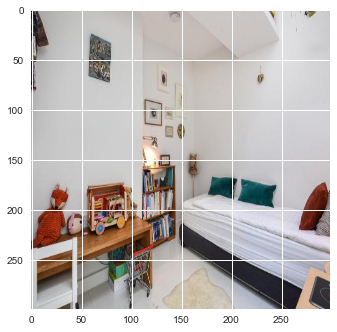

In [16]:
print(interior_test_pred.loc[mask]['image_path'].iloc[8])
img = nutil.read_img(interior_test_pred.loc[mask]['image_path'].iloc[8])
plt.figure()
plt.imshow(img)

### An alternative approach

Given the 'valid' application of several labels to some images, how about we consider any label in top 3 with a P >0.1, and if correct, then count that as the 'correct' label.

(In practical terms, this would amount to labelling all images with any prediction at >0.1, and assessing if ONE of those labels matches the 'defined' label)

In [12]:
def label_to_count(row):
    if row['label1'] == row['room']:
        return row['label1']
    elif row['label2'] == row['room'] and row['label2_P'] >=0.1:
        return row['label2']
    elif row['label3'] == row['room'] and row['label3_P'] >=0.1:
        return row['label3']
    else:
        return row['label1']

In [13]:
interior_test_pred['pred_from_3'] = interior_test_pred.apply(label_to_count, axis=1)
interior_test_pred.head()

,room,label1,label1_P,label2,label2_P,label3,label3_P,label1_correct,label2_correct,label3_correct,image_path,filename,id,pred_from_3
0,bathroom,bathroom,0.999998,kitchen,0.000001,empty,7.169086e-08,True,False,False,./data/test_data/bathroom/003457d1fb62155b4531...,003457d1fb62155b4531aba3e5b39f4d57bed9f9.jpg,003457d1fb62155b4531aba3e5b39f4d57bed9f9,bathroom
1,bathroom,bathroom,0.999782,kitchen,0.000217,diningroom,9.364485e-07,True,False,False,./data/test_data/bathroom/0038cad4553a9922d24a...,0038cad4553a9922d24a70a4d77abb9d2c1261f9.jpg,0038cad4553a9922d24a70a4d77abb9d2c1261f9,bathroom
2,bathroom,bathroom,0.999678,bedroom,0.000118,kitchen,1.028072e-04,True,False,False,./data/test_data/bathroom/003f5052b875f64f4f5c...,003f5052b875f64f4f5ce99948ae87f35d44b009.jpg,003f5052b875f64f4f5ce99948ae87f35d44b009,bathroom
3,bathroom,bathroom,0.999844,kitchen,0.000082,bedroom,5.523511e-05,True,False,False,./data/test_data/bathroom/009e866e3eb114c3bc85...,009e866e3eb114c3bc8579d780a4c333ddd38da9.jpg,009e866e3eb114c3bc8579d780a4c333ddd38da9,bathroom
4,bathroom,bathroom,0.999998,kitchen,0.000002,diningroom,1.329193e-09,True,False,False,./data/test_data/bathroom/00da56e13e015b383eff...,00da56e13e015b383effff3fe8560ae7fa7cb1f9.jpg,00da56e13e015b383effff3fe8560ae7fa7cb1f9,bathroom


Now what would the accuracy, classification report and confusion matrix look like?

Accuracy score (Label1): 0.9380

              precision    recall  f1-score   support

    bathroom       0.99      0.97      0.98       602
     bedroom       0.97      0.98      0.97       856
conservatory       1.00      0.77      0.87        22
  diningroom       0.93      0.80      0.86       277
       empty       0.92      0.98      0.95       362
    entrance       0.94      0.86      0.90       105
     graphic       1.00      0.87      0.93        23
     kitchen       0.93      0.97      0.95       681
  livingroom       0.93      0.95      0.94       704
    misc_int       0.83      0.71      0.77       154
       study       0.64      0.74      0.69        66

 avg / total       0.94      0.94      0.94      3852



''

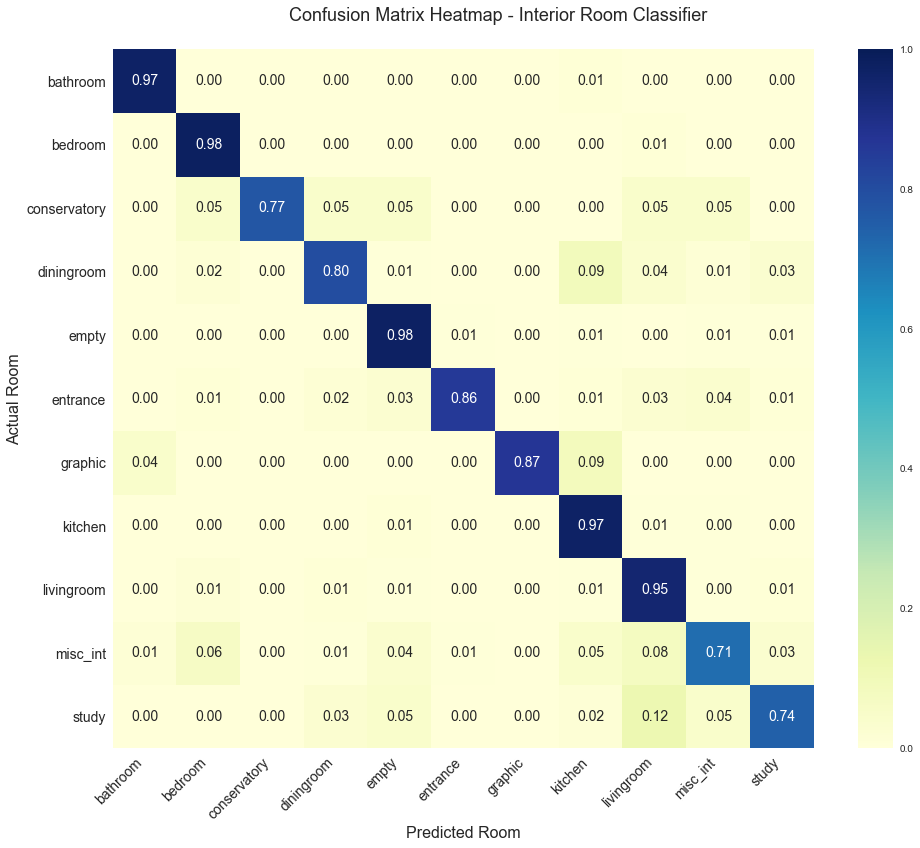

In [14]:
y_true = interior_test_pred['room']
y_pred = interior_test_pred['pred_from_3']
labels = interior_test_pred['room'].unique()

conf_mat = confusion_matrix(y_true, y_pred, labels=labels)

print('Accuracy score (Label1): {:.4f}\n'.format(accuracy_score(y_true, y_pred)))
print(classification_report(y_true, y_pred))

fig, ax = plt.subplots(figsize=(14,12))


nplot.plot_confusion_matrix(conf_mat, labels, fig, ax, normalise=True)
;

In [27]:
#fig.savefig('./working_data/confusion_mat_top_3.png')

The cell below is used to create image grids from different subsets of the test data (using masks)

/Users/Chris/anaconda3/envs/nested/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


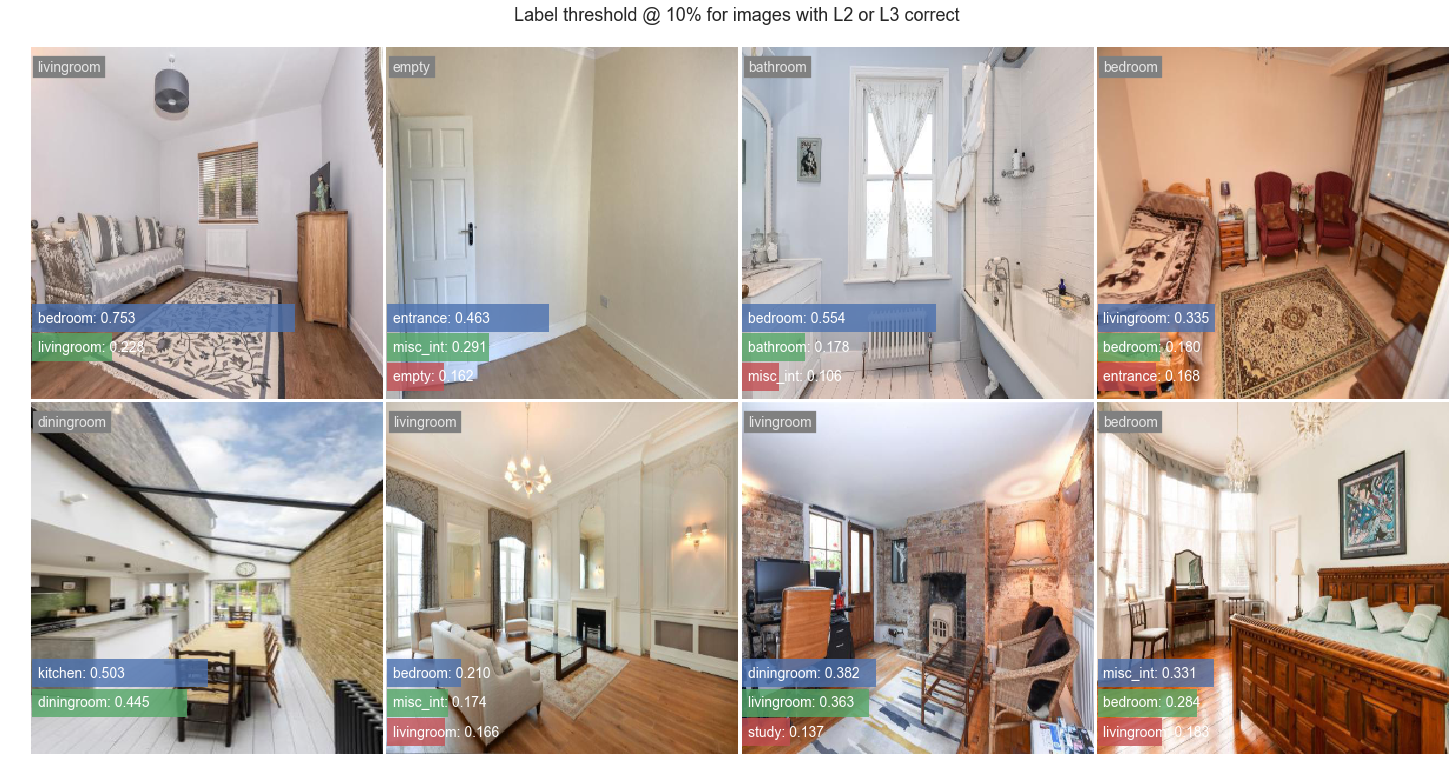

In [20]:
mask1 = ((interior_test_pred['label1_correct'] == True))

mask2 = ((interior_test_pred['pred_from_3'] == interior_test_pred['label2']) |
         (interior_test_pred['pred_from_3'] == interior_test_pred['label3']))

mask3 = ((interior_test_pred['label1_correct'] == False) & (interior_test_pred['label1_P'] > 0.9))

data = interior_test_pred.loc[mask2]

label_fn = nplot.label_probs
label_info = {'num_labels': 3,
              'show_actual': True,
              'threshold' : 0.1
              }


nplot.image_grid(data, image_path='image_path',  image_size='xl', save=True,
           fig_title="Label threshold @ 10% for images with L2 or L3 correct",
            fill_grid=True, f_stem='threshold_10%_L2orL3_correct',
          label_info=label_info, label_fn=label_fn, annotate=True,
                output_dir = './image_grids/comp_images/')